In [2]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys, cv2, glob, os, time
import pandas as pd 
import io
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten,Activation

from keras.models import Sequential, Model
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
import matplotlib.pyplot as plt

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding


In [3]:
from mealpy.swarm_based.PSO import BasePSO
from mealpy.evolutionary_based.GA import BaseGA
from mealpy.evolutionary_based.DE import BaseDE
from mealpy.swarm_based.MFO import BaseMFO
import numpy as np

In [4]:
dataF=pd.read_csv('cicddos2019_dataset.csv')

dataI=pd.read_csv('iot23_combined.csv')

In [5]:
dataI=dataI.drop('Unnamed: 0',axis=1)
dataI[:2]

,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,144.0,...,0,0,0,0,0,0,0,1,0,0
1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,339.0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
dataF=dataF.drop('Unnamed: 0',axis=1)
dataF[:2]

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,35.08846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [7]:
# Categorize data into 'Benign' and 'Attack'
dataI['label'] = dataI['label'].apply(lambda x: 'Benign' if x == 'Benign' else 'Attack')


In [8]:
from collections import Counter
Counter(dataI["label"])

Counter({'Benign': 53481, 'Attack': 1393140})

In [9]:
from collections import Counter
Counter(dataF["Class"])

Counter({'Attack': 333540, 'Benign': 97831})

In [10]:
dataI.rename(columns = {'label':'Target'}, inplace = True)
dataF.rename(columns = {'Class':'Target'}, inplace = True)

In [11]:
dataF

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Target
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431367,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431368,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431369,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [12]:
DataITarget=dataI[["Target"]]

dataIFeatures=dataI.drop(["Target"], axis=1)

DataFTarget=dataF[["Target","Label"]]

dataFFeatures=dataF.drop(["Target","Label"], axis=1)

In [13]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

dataIFeatures=dataIFeatures.apply(LabelEncoder().fit_transform)

In [14]:
dataFFeatures=dataFFeatures.apply(LabelEncoder().fit_transform)

In [15]:
dataIFeatures

,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,518258,1352,545,1,1,0,5,80,3,48,...,0,0,0,0,0,0,0,1,0,0
1,518257,1352,2579,13,170,0,1,9,1,108,...,0,0,0,0,0,0,0,1,0,0
2,518256,1352,43119,379,1,0,48,1049,0,0,...,0,0,0,1,0,0,0,0,0,0
3,518260,1352,5256,26,13,0,1,21,1,13,...,0,0,0,0,0,0,0,1,0,0
4,518261,1352,3897,26,13,0,1,21,1,13,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,399991,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1446617,399992,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1446618,399993,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1446619,399994,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
len(dataIFeatures)

1446621

ETC


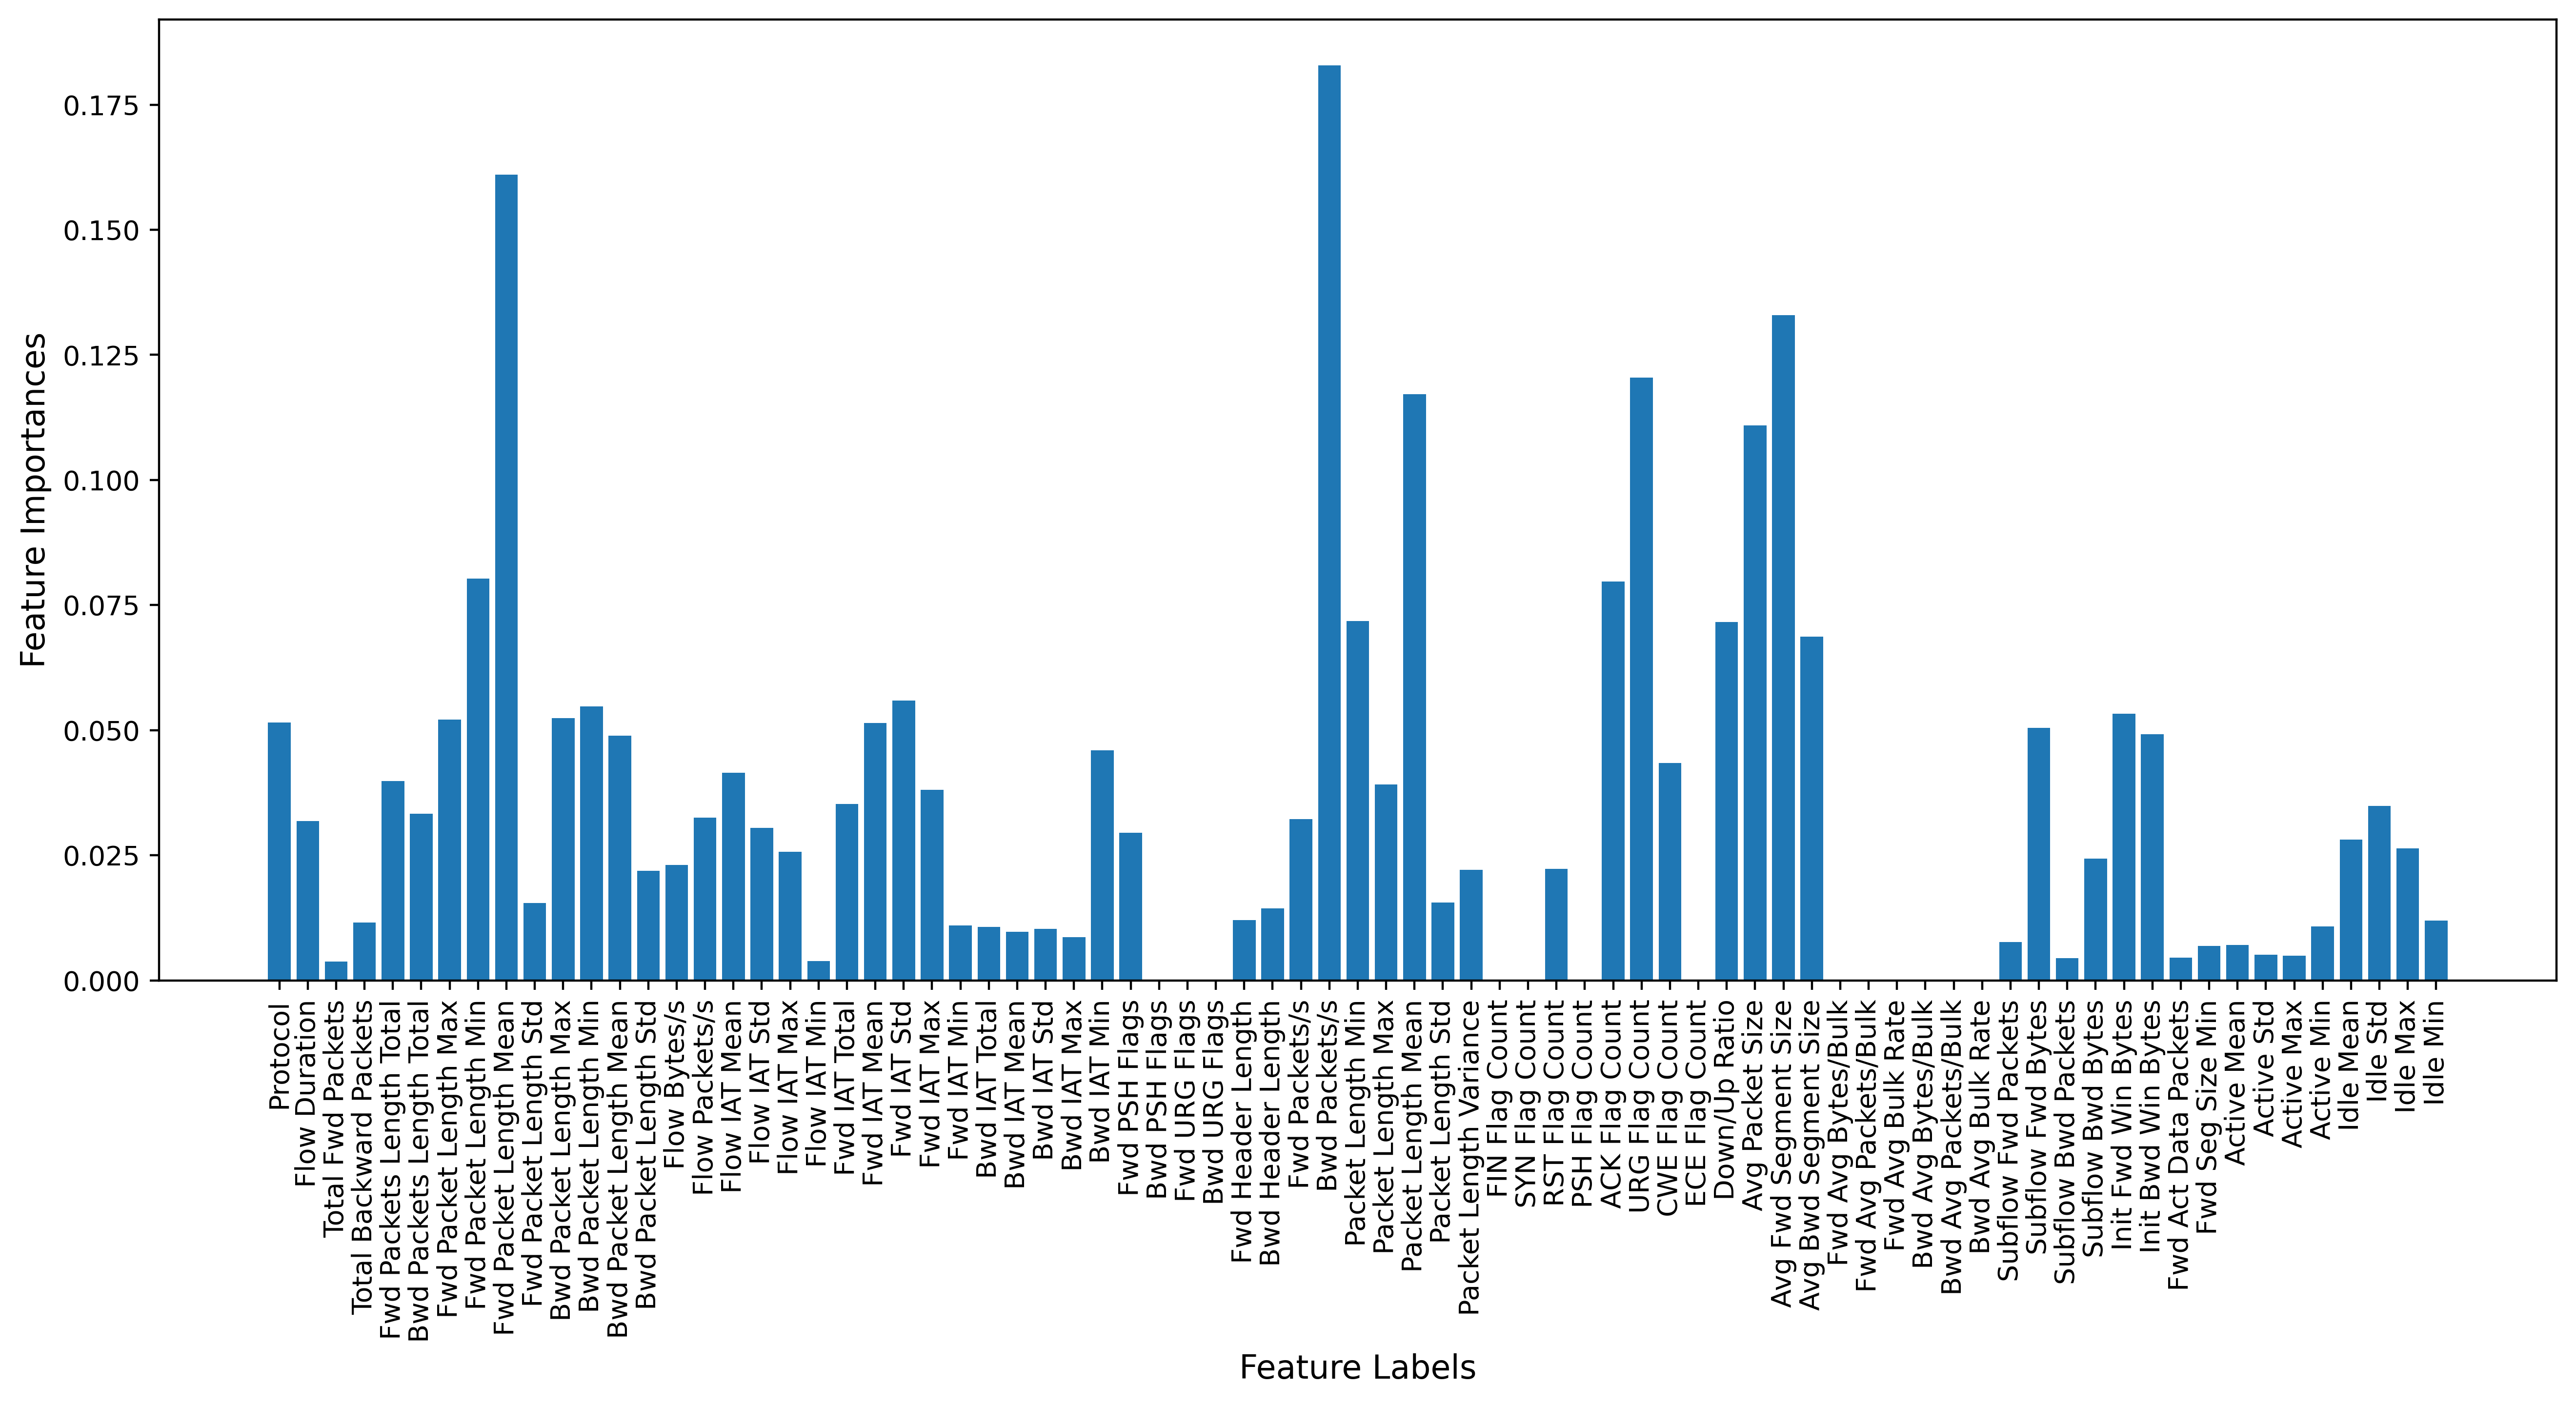

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=10)

X =dataFFeatures

y =  DataFTarget["Target"]
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(13,7),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('FeatureImp.pdf')
plt.show()

In [18]:
featuresimpF=[]
for i in range (len(X.columns)):
    if feature_importance_normalized[i]>0.02:
        featuresimpF.append(X.columns[i])
len(featuresimpF)        

43

ETC


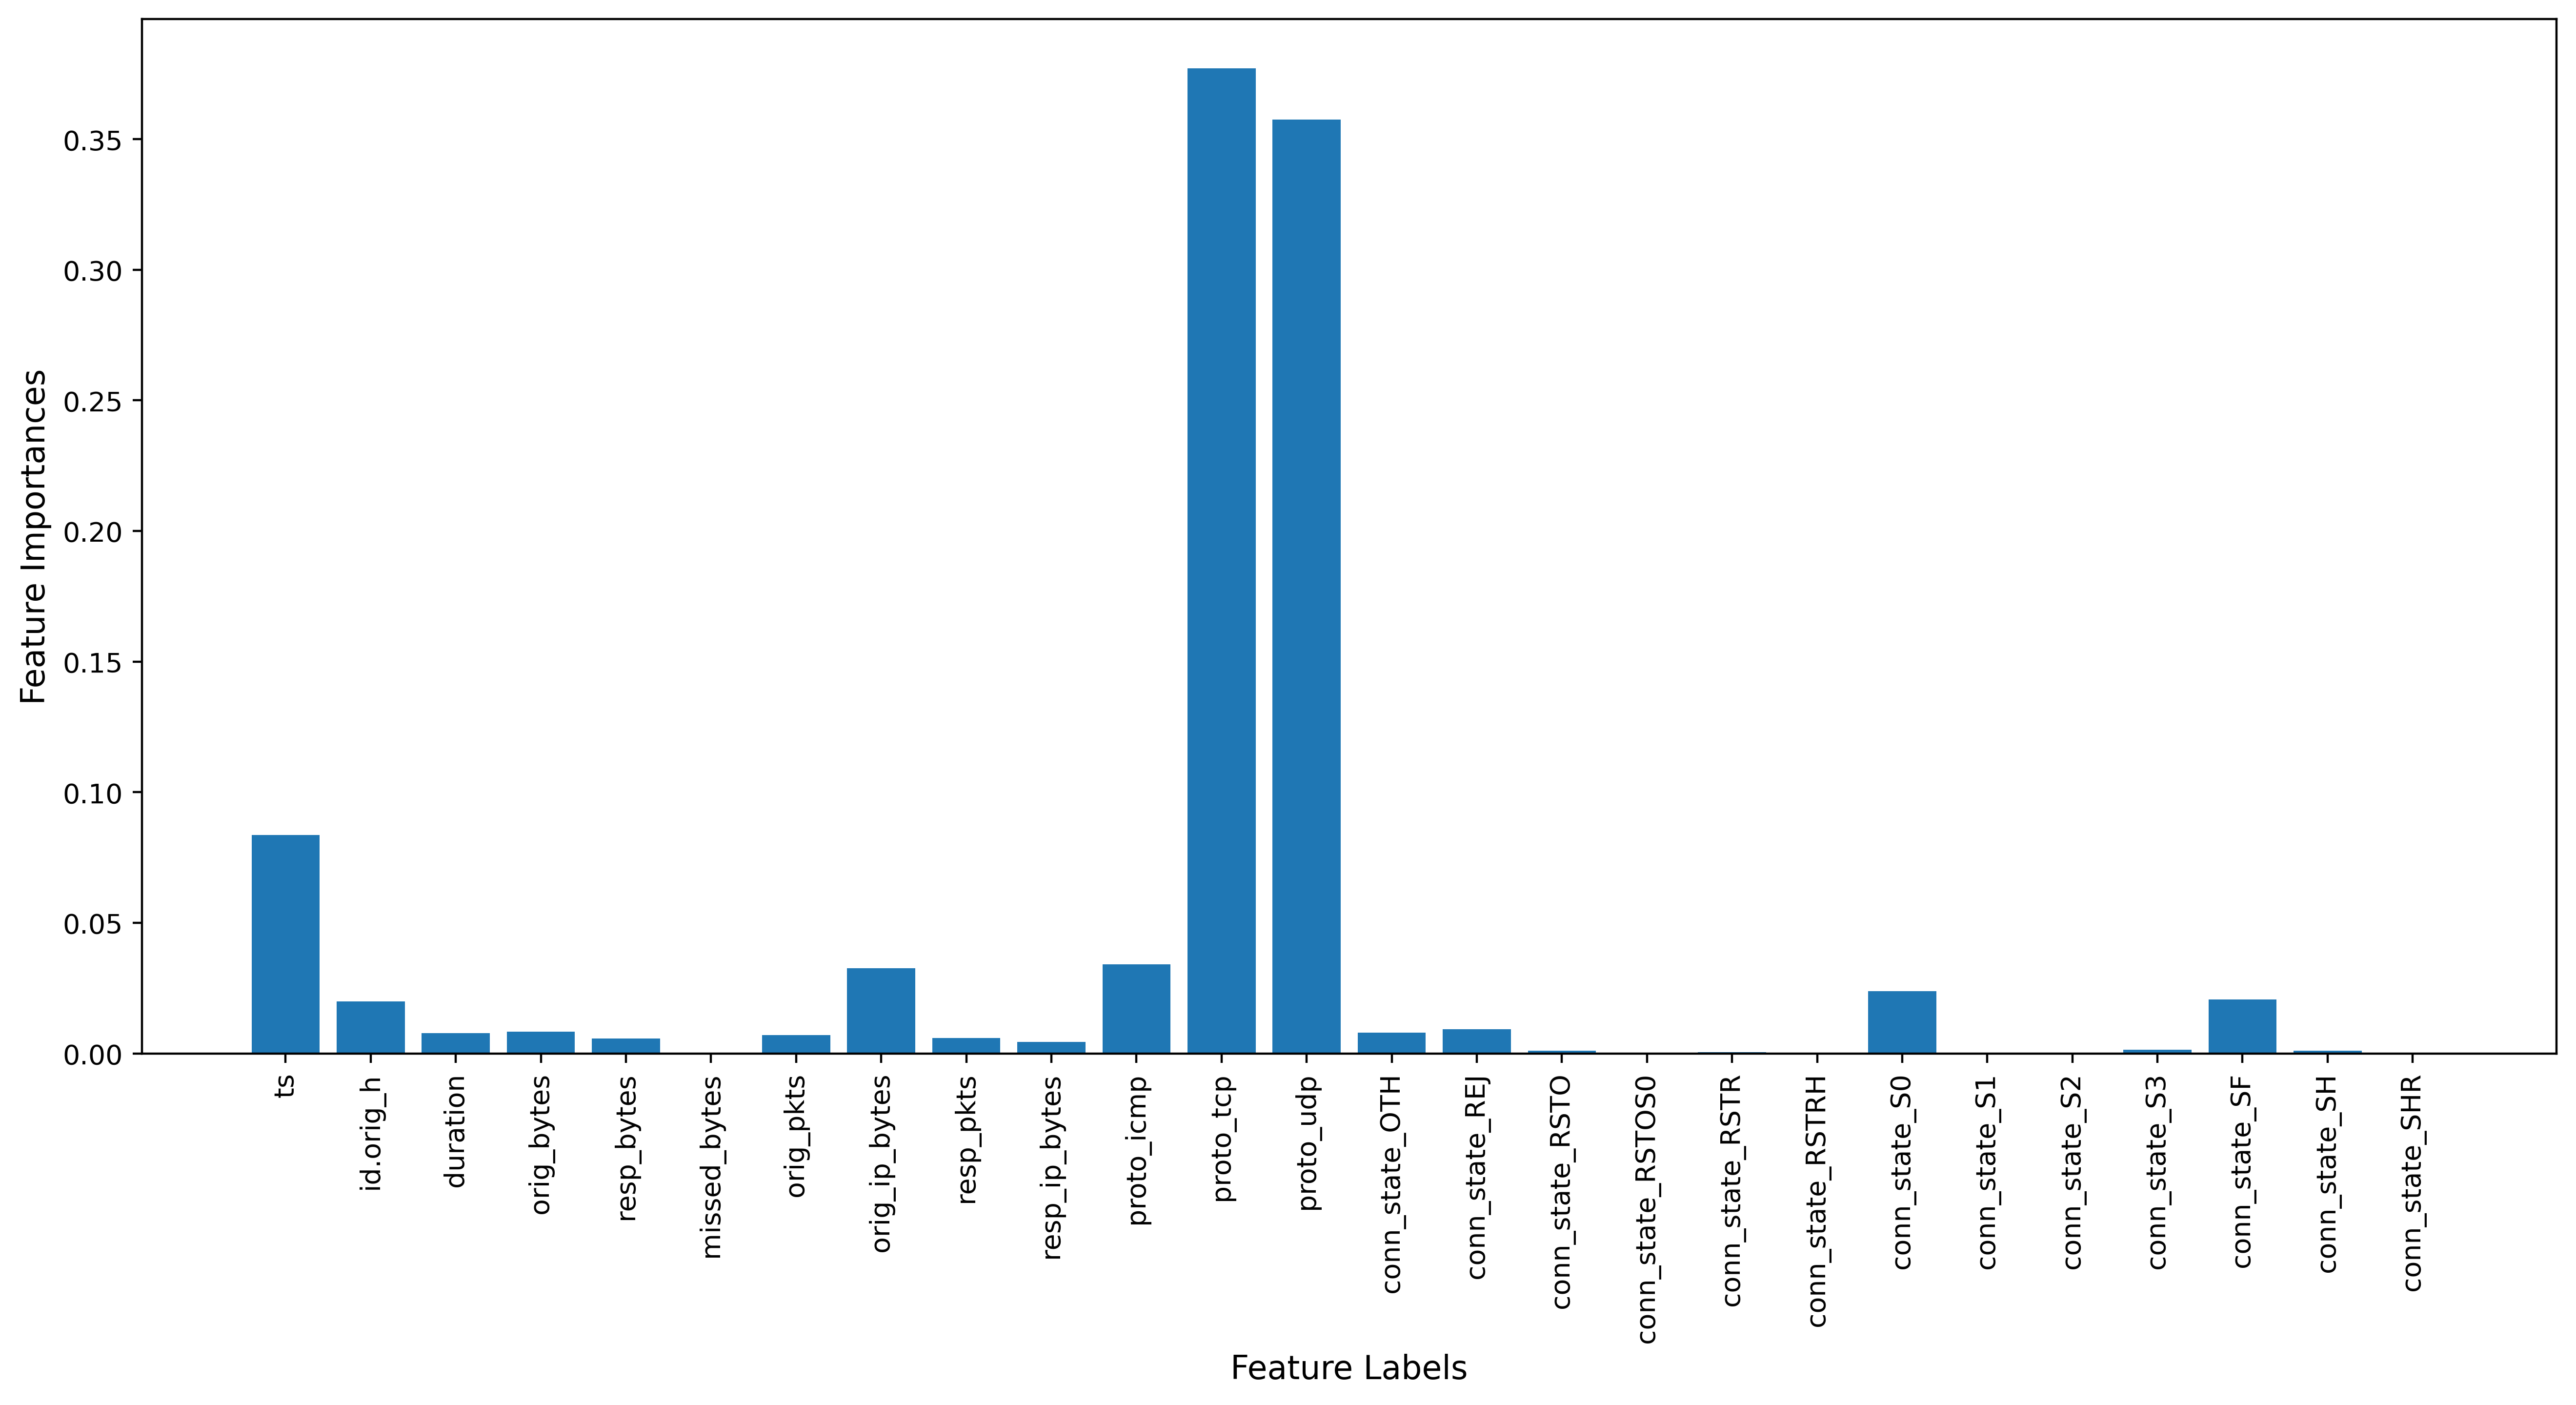

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=10)

X =dataIFeatures

y =  DataITarget["Target"]
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(13,7),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('FeatureImp.pdf')
plt.show()

In [20]:
featuresimp=[]
for i in range (len(X.columns)):
    if feature_importance_normalized[i]>0.001:
        featuresimp.append(X.columns[i])
len(featuresimp)       

19

In [21]:
dataIFeatures= dataIFeatures[featuresimp]

In [22]:
dataFFeatures= dataFFeatures[featuresimpF]

In [23]:
dataIFeatures.shape[1]

19

In [24]:
Counter(DataITarget['Target'][:50000])

Counter({'Benign': 23215, 'Attack': 26785})

In [25]:
Counter(DataFTarget['Target'][:50000])

Counter({'Attack': 42747, 'Benign': 7253})

In [26]:
from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA

# Simulate two datasets (these would be your network datasets with different features)
X1= dataIFeatures[:50000]
X2 = dataFFeatures[:50000]

# First, reduce the dimensionality of both datasets to make them more manageable
#pca1 = PCA(n_components=20)
#pca2 = PCA(n_components=20)

#X1_pca = pca1.fit_transform(X1)
#X2_pca = pca2.fit_transform(X2)

# Now, perform CCA to align the two datasets in a shared space
cca = CCA(n_components=15)
X1_c, X2_c = cca.fit_transform(X1, X2)

# X1_c and X2_c are now aligned in the same manifold space
newDI=pd.DataFrame(X1_c)
newDF=pd.DataFrame(X2_c)

MENFCCA = pd.concat([newDI, newDF], ignore_index=True)
MENTCCA = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], ignore_index=True)

In [27]:

from sklearn.cross_decomposition import PLSCanonical
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA

# Simulate two datasets (these would be your network datasets with different features)
X1= dataIFeatures[:50000]
X2 = dataFFeatures[:50000]



# Now, perform CCA to align the two datasets in a shared space
cca = PLSCanonical(n_components=15)
X1_c, X2_c = cca.fit_transform(X1, X2)

# X1_c and X2_c are now aligned in the same manifold space
newDI=pd.DataFrame(X1_c)
newDF=pd.DataFrame(X2_c)

MENFPSL = pd.concat([newDI, newDF], ignore_index=True)
MENTPSL = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], ignore_index=True)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(MENFCCA, MENTCCA, test_size=0.20, stratify=MENTCCA, shuffle=True)

In [29]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.96955
              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98     13906
      Benign       0.97      0.93      0.95      6094

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

[[13714   192]
 [  417  5677]]
Wall time: 3min 5s


In [31]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.33


In [32]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  ExtraTreesClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9624
              precision    recall  f1-score   support

      Attack       0.97      0.97      0.97     13906
      Benign       0.94      0.93      0.94      6094

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.96     20000
weighted avg       0.96      0.96      0.96     20000

[[13556   350]
 [  402  5692]]
Wall time: 25.2 s


In [33]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.33


In [34]:
%%time

from sklearn.linear_model import LogisticRegression
a=LogisticRegression(solver='liblinear',multi_class='ovr',C=2.0)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9392
              precision    recall  f1-score   support

      Attack       0.92      1.00      0.96     13906
      Benign       0.99      0.81      0.89      6094

    accuracy                           0.94     20000
   macro avg       0.96      0.90      0.92     20000
weighted avg       0.94      0.94      0.94     20000

[[13867    39]
 [ 1177  4917]]
Wall time: 1.63 s


In [35]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.08


In [36]:
%%time

from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier(n_neighbors=7)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.977
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13890    16]
 [  444  5650]]
Wall time: 3.13 s


In [37]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.33


In [45]:
%%time

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=2,n_estimators=300)
lg=lgbmc.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.9774
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13888    18]
 [  434  5660]]
Wall time: 2.03 s


In [46]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(lgbmc, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.33


In [43]:
%%time

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
lg=clf.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.72915
              precision    recall  f1-score   support

      Attack       0.72      0.99      0.84     13906
      Benign       0.82      0.14      0.24      6094

    accuracy                           0.73     20000
   macro avg       0.77      0.56      0.54     20000
weighted avg       0.75      0.73      0.65     20000

[[13721   185]
 [ 5232   862]]
Wall time: 1.07 s


In [44]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(clf, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.08


In [33]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:07:48<00:00, 140.30s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.97,None,0.98,1.01
LabelPropagation,0.98,0.97,None,0.98,1155.94
KNeighborsClassifier,0.98,0.96,None,0.98,4.84
SVC,0.98,0.96,None,0.98,251.01
AdaBoostClassifier,0.98,0.96,None,0.98,42.26
BaggingClassifier,0.97,0.96,None,0.97,64.96
RandomForestClassifier,0.97,0.96,None,0.97,55.29
ExtraTreesClassifier,0.96,0.96,None,0.96,17.06
ExtraTreeClassifier,0.96,0.95,None,0.96,1.14


In [47]:
X_train, X_test, y_train, y_test = train_test_split(MENFPSL, MENTPSL, test_size=0.20, stratify=MENTPSL, shuffle=True)

In [48]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


0.9733
              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98     13906
      Benign       0.98      0.93      0.96      6094

    accuracy                           0.97     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000

[[13793   113]
 [  421  5673]]
Wall time: 3min 1s


In [49]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.33


In [50]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  ExtraTreesClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.96415
              precision    recall  f1-score   support

      Attack       0.97      0.98      0.97     13906
      Benign       0.95      0.93      0.94      6094

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

[[13593   313]
 [  404  5690]]
Wall time: 23.9 s


In [51]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.68 accuracy with a standard deviation of 0.35


In [52]:
%%time
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(solver='liblinear',multi_class='ovr',C=2.0)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.95075
              precision    recall  f1-score   support

      Attack       0.94      0.99      0.97     13906
      Benign       0.98      0.85      0.91      6094

    accuracy                           0.95     20000
   macro avg       0.96      0.92      0.94     20000
weighted avg       0.95      0.95      0.95     20000

[[13811    95]
 [  890  5204]]
Wall time: 1.37 s


In [53]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.04


In [54]:
%%time
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier(n_neighbors=7)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.97745
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13891    15]
 [  436  5658]]
Wall time: 2.81 s


In [55]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.34


In [56]:
%%time

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=2,n_estimators=300)
lg=lgbmc.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.978
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13898     8]
 [  432  5662]]
Wall time: 2.45 s


In [57]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.34


In [60]:
%%time

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
lg=clf.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.7616
              precision    recall  f1-score   support

      Attack       0.77      0.94      0.85     13906
      Benign       0.73      0.34      0.47      6094

    accuracy                           0.76     20000
   macro avg       0.75      0.64      0.66     20000
weighted avg       0.76      0.76      0.73     20000

[[13136   770]
 [ 3998  2096]]
Wall time: 1.04 s


In [61]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(clf, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.14


In [41]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:01:15<00:00, 126.76s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.97,None,0.98,0.99
LabelPropagation,0.98,0.97,None,0.98,1046.22
KNeighborsClassifier,0.98,0.97,None,0.98,2.17
SVC,0.98,0.97,None,0.98,180.52
AdaBoostClassifier,0.98,0.96,None,0.98,19.12
BaggingClassifier,0.97,0.96,None,0.97,27.96
RandomForestClassifier,0.97,0.96,None,0.97,57.13
ExtraTreesClassifier,0.97,0.96,None,0.97,6.87
DecisionTreeClassifier,0.96,0.96,None,0.96,3.69


In [28]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

MENTPSL=LabelEncoder().fit_transform(MENTPSL)

In [29]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

MENTCCA=LabelEncoder().fit_transform(MENTCCA)

In [30]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

X1=np.array(MENFPSL)
# Reshape the data for 1D CNN
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)  # Assuming each row is a sequence

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, MENTPSL, test_size=0.2, random_state=42)

# Define the RNN-LSTM model
model = Sequential([
    SimpleRNN(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(units=1,activation='sigmoid')
])


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model with dropout for regularization
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/100
2500/2500 [==============================] - 37s 14ms/step - loss: 0.1046 - accuracy: 0.9718 - val_loss: 0.0933 - val_accuracy: 0.9751
Epoch 2/100
2500/2500 [==============================] - 34s 14ms/step - loss: 0.0892 - accuracy: 0.9760 - val_loss: 0.0906 - val_accuracy: 0.9743
Epoch 3/100
2500/2500 [==============================] - 34s 13ms/step - loss: 0.0881 - accuracy: 0.9760 - val_loss: 0.0890 - val_accuracy: 0.9747
Epoch 4/100
2500/2500 [==============================] - 34s 14ms/step - loss: 0.0872 - accuracy: 0.9762 - val_loss: 0.0862 - val_accuracy: 0.9757
Epoch 5/100
2500/2500 [==============================] - 34s 13ms/step - loss: 0.0865 - accuracy: 0.9763 - val_loss: 0.0855 - val_accuracy: 0.9757
Epoch 6/100
2500/2500 [==============================] - 35s 14ms/step - loss: 0.0861 - accuracy: 0.9765 - val_loss: 0.0881 - val_accuracy: 0.9750
Epoch 7/100
2500/2500 [==============================] - 36s 14ms/step - loss: 0.0856 - accuracy: 0.9765 - val_loss: 0

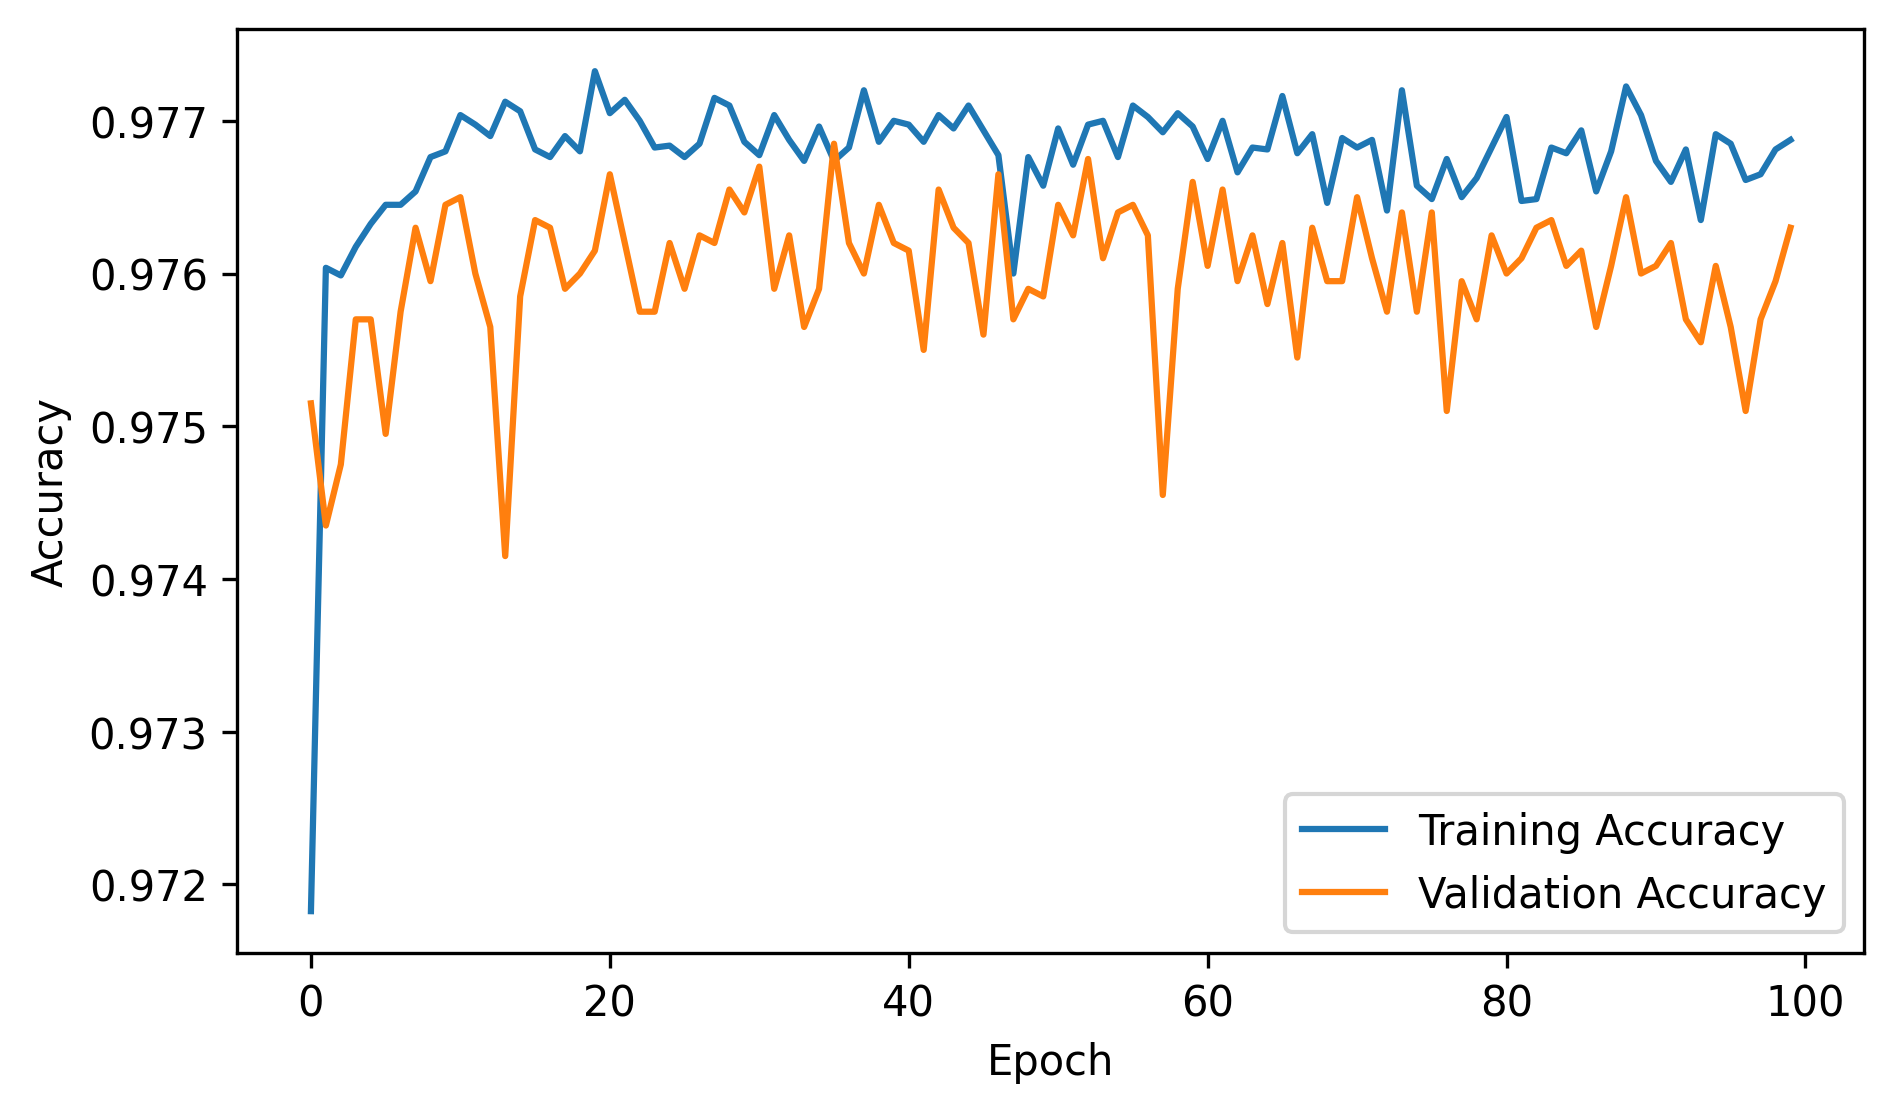

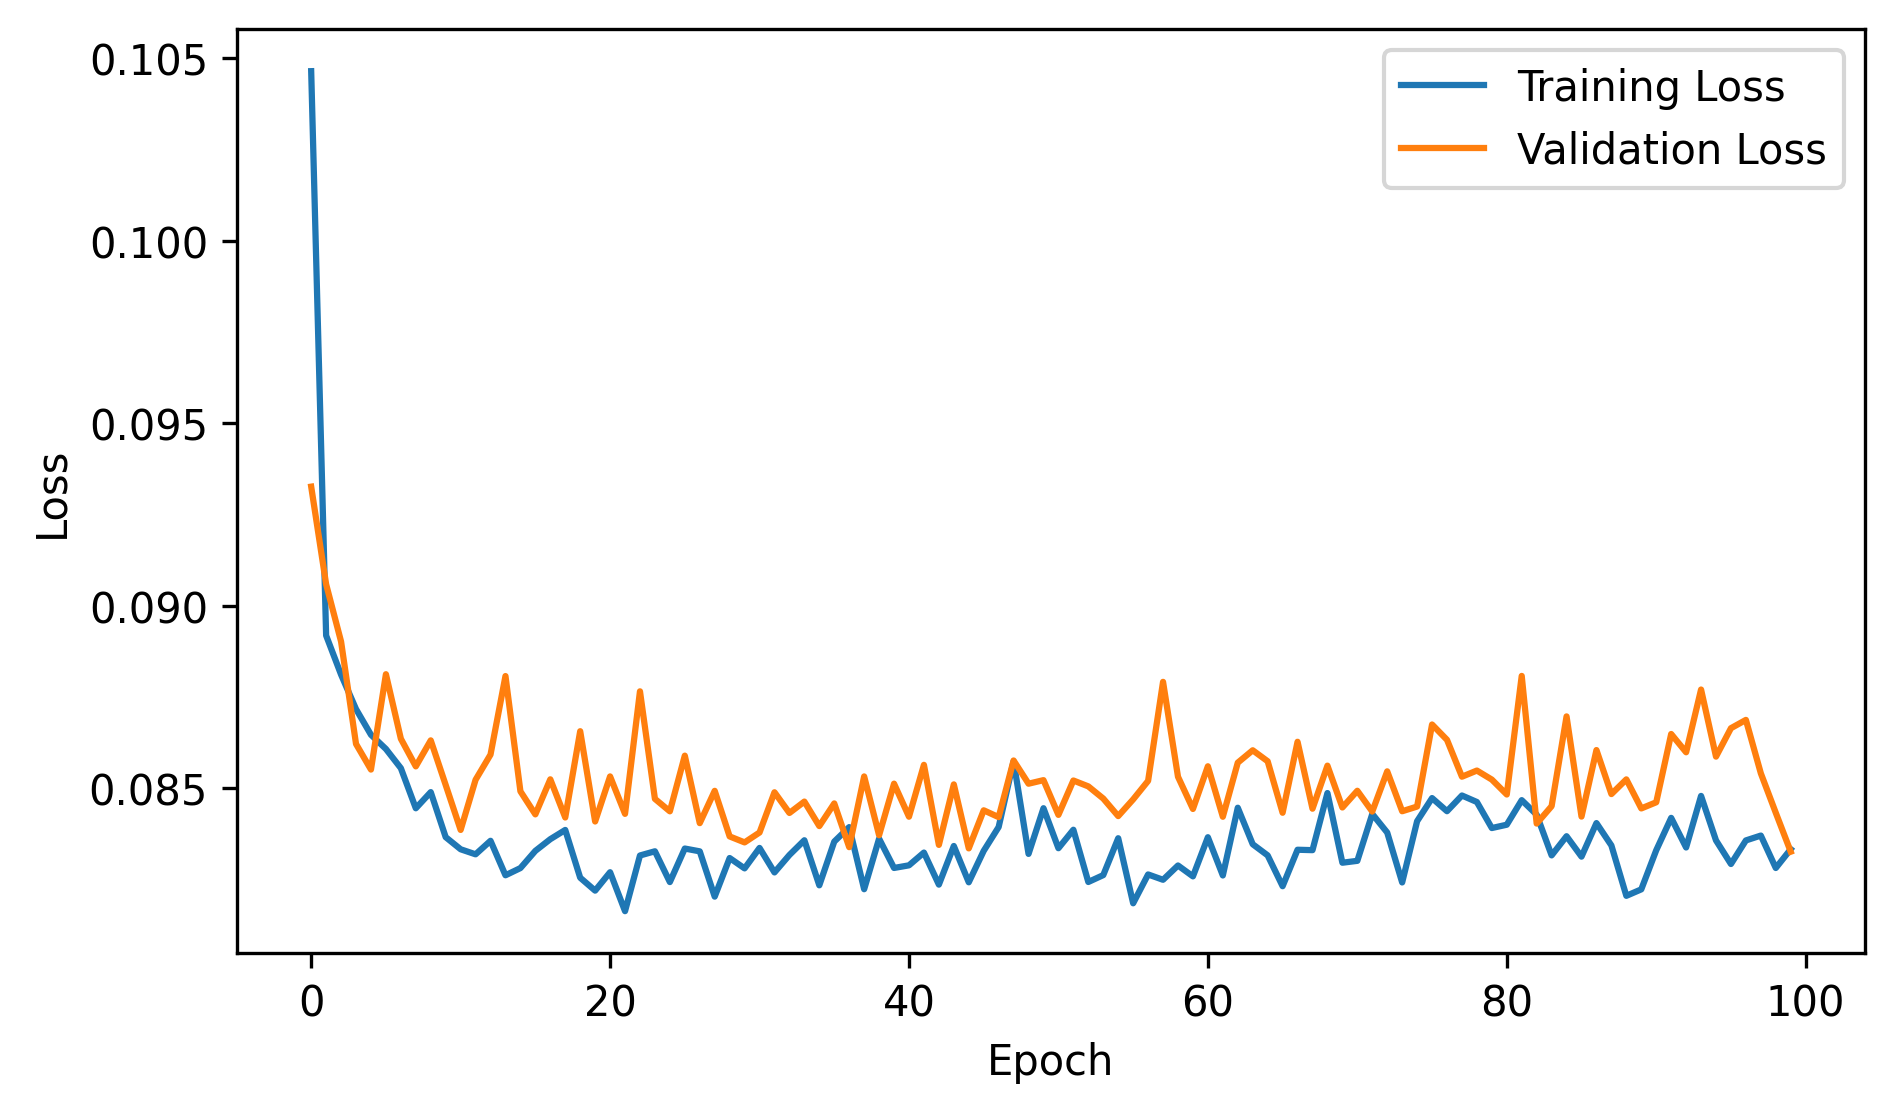

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4),dpi=300)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(7,4),dpi=300)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# Generate predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

625/625 [==============================] - 3s 4ms/step

Classification Report:
0.9763
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13911
           1       1.00      0.92      0.96      6089

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13900    11]
 [  463  5626]]


In [35]:
for layer in model.layers[:-2]:
    layer.trainable = False
    
from keras.models import Model
# Define the feature extraction model
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

extracted_features = feature_extractor.predict(X1)

3125/3125 [==============================] - 16s 5ms/step


In [36]:
extracted_features.shape

(100000, 32)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(extracted_features, MENTPSL, test_size=0.20, random_state=1, stratify=MENTPSL, shuffle=True)

In [63]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=200, random_state=2,max_depth=150) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9676
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13906
           1       0.96      0.94      0.95      6094

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

[[13645   261]
 [  387  5707]]
Wall time: 32.3 s


In [64]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.32


In [65]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  ExtraTreesClassifier(n_estimators=200, random_state=2,max_depth=150) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.96565
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13906
           1       0.95      0.94      0.94      6094

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

[[13603   303]
 [  384  5710]]
Wall time: 13 s


In [66]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.32


In [67]:
%%time

from sklearn.linear_model import LogisticRegression
a=LogisticRegression( solver='liblinear',multi_class='ovr',C=2.0)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.97825
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13897     9]
 [  426  5668]]
Wall time: 521 ms


In [68]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.01
Wall time: 3.48 s


In [69]:
%%time
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier(n_neighbors=5)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.97775
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13878    28]
 [  417  5677]]
Wall time: 4.62 s


In [70]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.32
Wall time: 39.6 s


In [71]:
%%time

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=2,n_estimators=300)
lg=lgbmc.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.97855
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13894    12]
 [  417  5677]]
Wall time: 2.13 s


In [72]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(lgbmc, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.30
Wall time: 20.1 s


In [73]:
%%time

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
lg=clf.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.978
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13894    12]
 [  428  5666]]
Wall time: 135 ms


In [74]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(clf, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.01
Wall time: 622 ms


In [100]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [2:42:03<00:00, 335.28s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.96,0.96,0.98,3.47
KNeighborsClassifier,0.98,0.96,0.96,0.98,1.34
AdaBoostClassifier,0.98,0.96,0.96,0.98,2.22
RidgeClassifierCV,0.98,0.96,0.96,0.98,0.10
RidgeClassifier,0.98,0.96,0.96,0.98,0.11
NuSVC,0.98,0.96,0.96,0.98,541.08
NearestCentroid,0.98,0.96,0.96,0.98,0.26
LinearDiscriminantAnalysis,0.98,0.96,0.96,0.98,0.17
LinearSVC,0.98,0.96,0.96,0.98,0.55


In [50]:
extracted_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 3.0671759 , 0.        , ..., 2.198818  , 6.929346  ,
        6.4938807 ],
       [0.        , 1.0391525 , 0.        , ..., 3.355166  , 6.7442727 ,
        6.867384  ],
       [0.        , 1.5394393 , 0.        , ..., 0.81167215, 6.1183195 ,
        5.3498697 ]], dtype=float32)

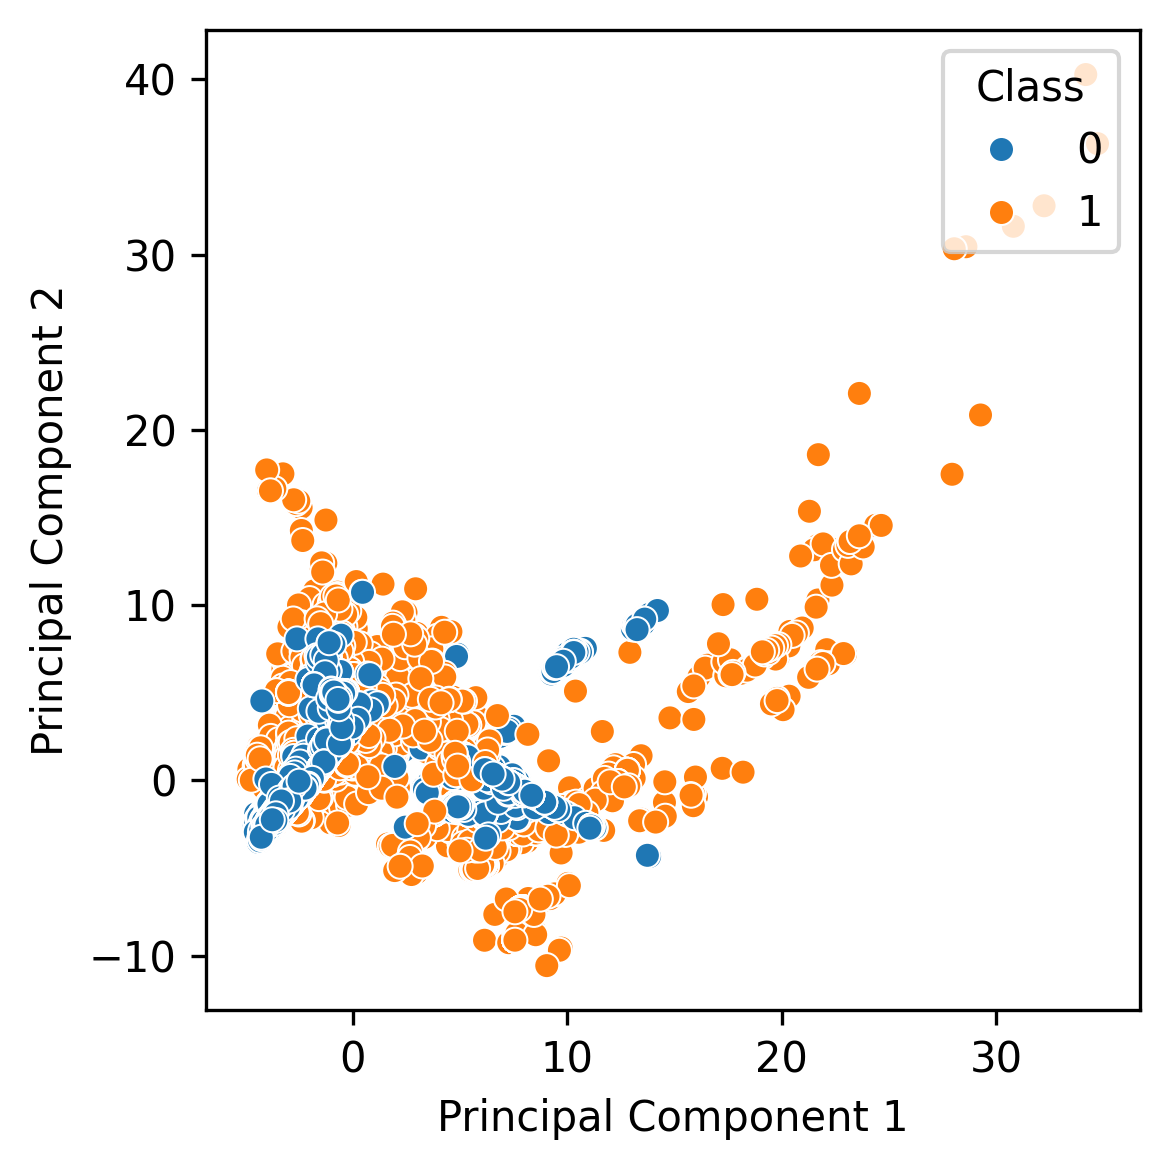

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your DataFrame containing all the features
# Assuming 'y' is a Series containing the class labels

# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it to the lower-dimensional space
X_pca = pca.fit_transform(MENFPSL)

# Create DataFrame combining the principal components and class labels
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = MENTPSL

# Create scatter plot of the first two principal components
plt.figure(figsize=(4, 4),dpi=300)
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()


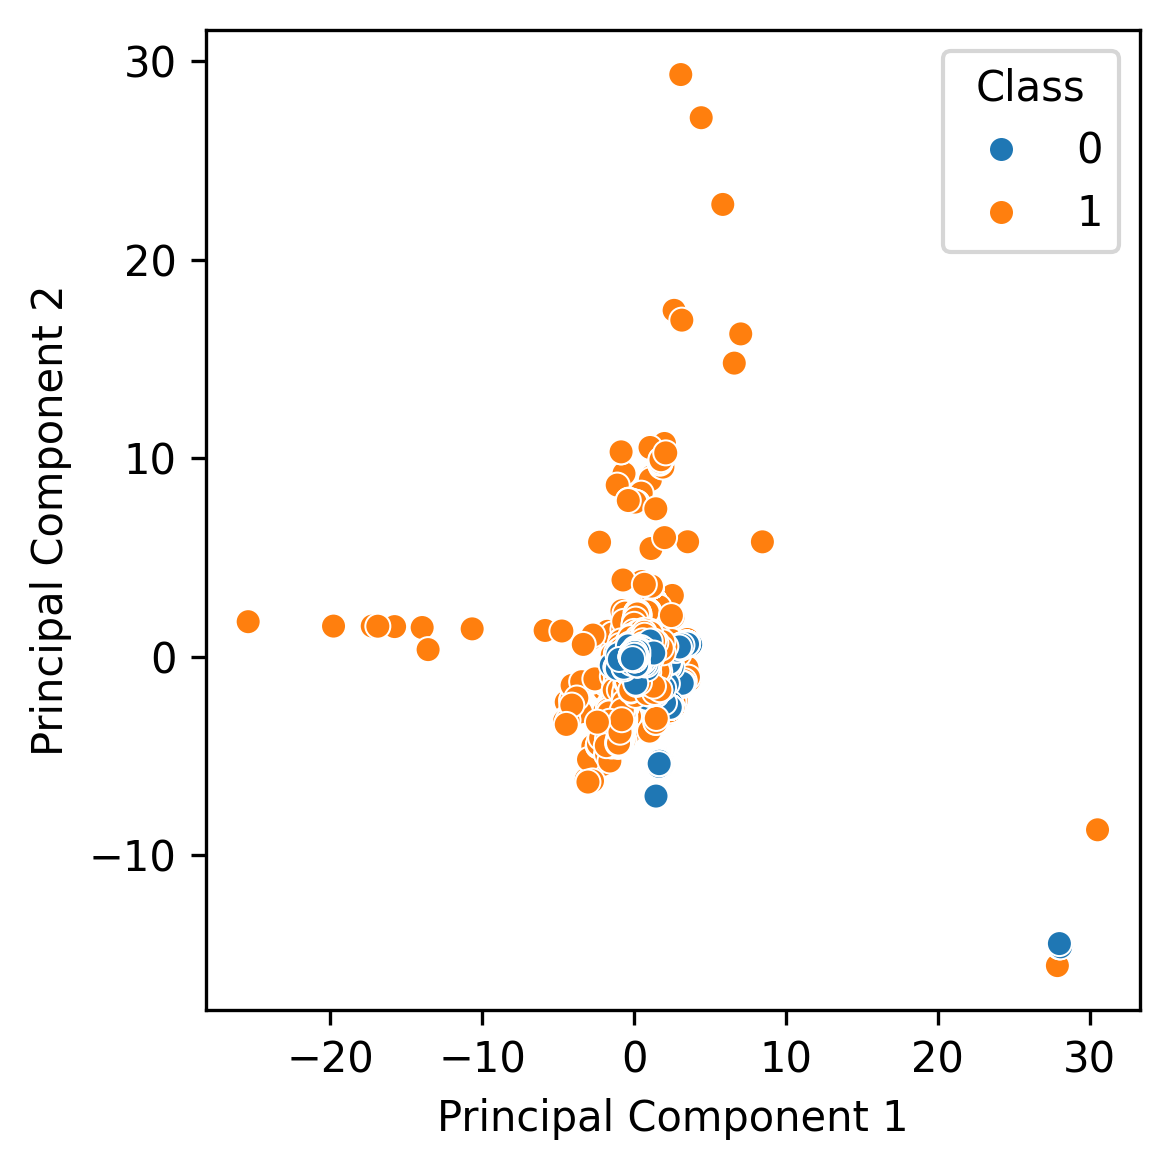

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your DataFrame containing all the features
# Assuming 'y' is a Series containing the class labels

# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it to the lower-dimensional space
X_pca = pca.fit_transform(MENFCCA)

# Create DataFrame combining the principal components and class labels
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = MENTCCA

# Create scatter plot of the first two principal components
plt.figure(figsize=(4, 4),dpi=300)
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()


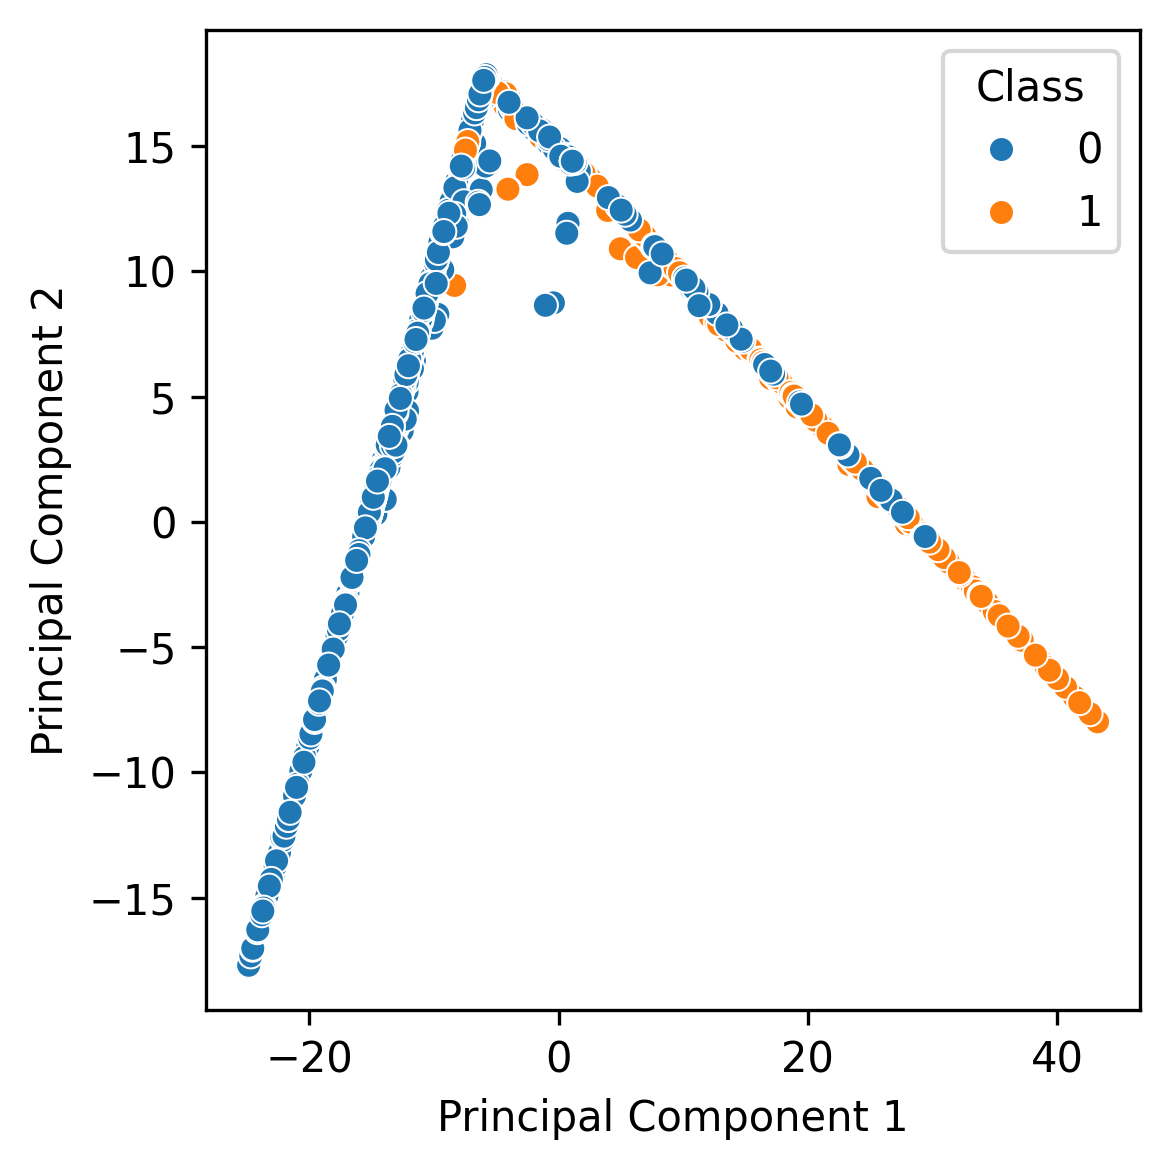

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your DataFrame containing all the features
# Assuming 'y' is a Series containing the class labels

# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it to the lower-dimensional space
X_pca = pca.fit_transform(extracted_features)

# Create DataFrame combining the principal components and class labels
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = MENTPSL

# Create scatter plot of the first two principal components
plt.figure(figsize=(4, 4),dpi=300)
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()


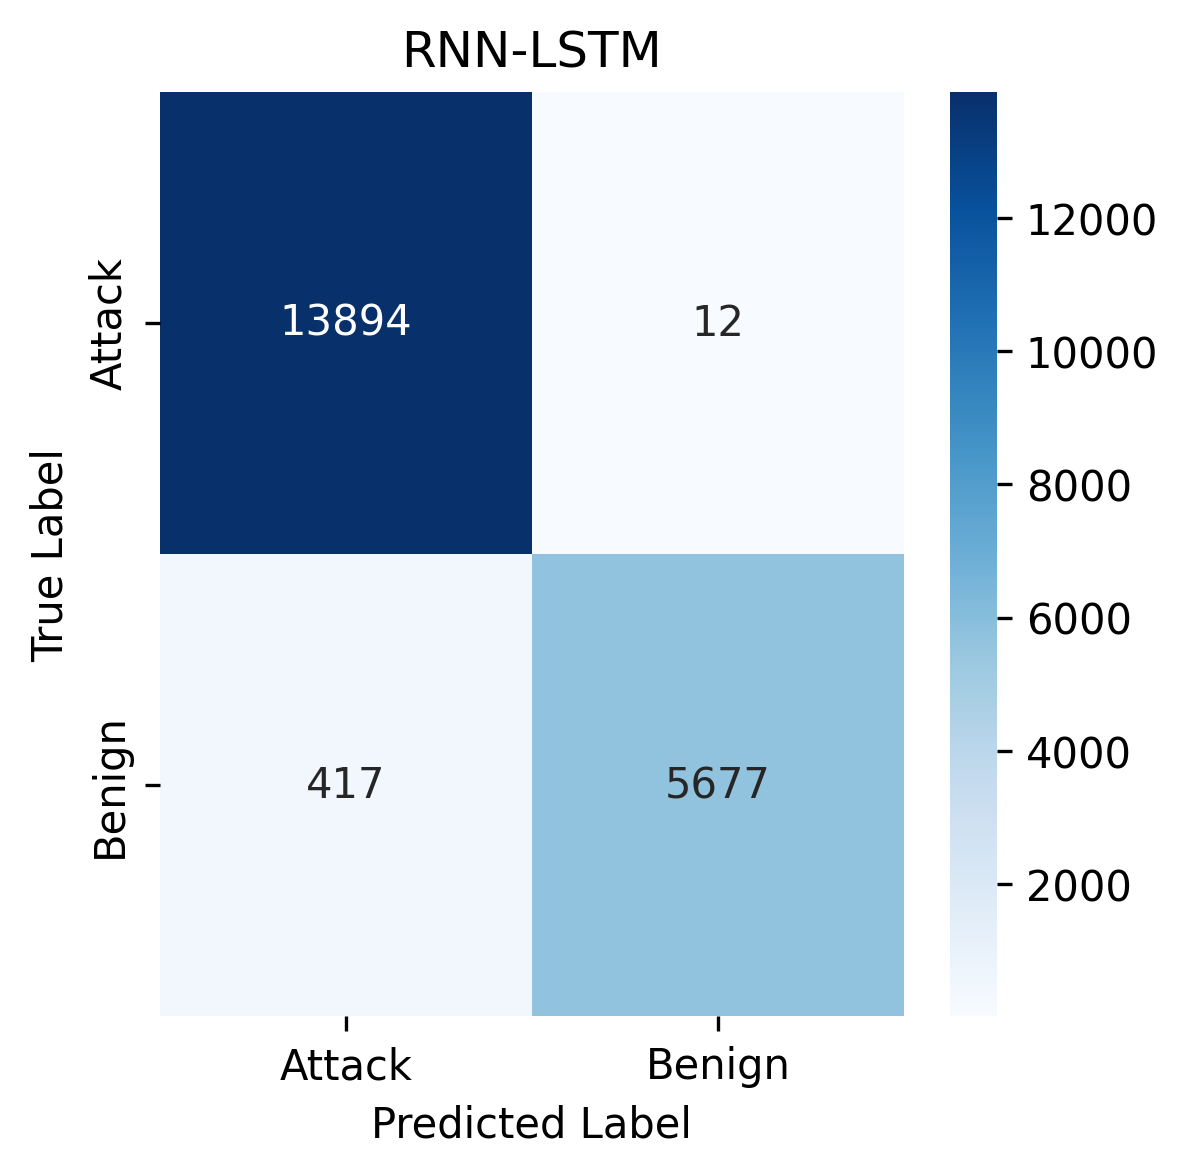

In [75]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
conf_matrix = np.array([[13894,    12],
 [  417,  5677]])

# Define class labels
class_labels = [ "Attack","Benign"]

# Plot confusion matrix
plt.figure(figsize=(4, 4),dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('RNN-LSTM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for CCA
cca_accuracy = [0.969, 0.939, 0.977, 0.977, 0.729]

# Accuracy scores for PSL
psl_accuracy = [0.973, 0.950, 0.977, 0.978, 0.761]

# Models
models = ['RF', 'LR', 'KNN', 'LGBM', 'GNB']

# Plotting
plt.plot(models, cca_accuracy, marker='o', label='CCA')
plt.plot(models, psl_accuracy, marker='o', label='PSL')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Models for CCA and PSL')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['GNB', 'LGBM', 'KNN', 'LR', 'RF']

# Accuracy scores and standard deviations for RNN-LSTM
rnn_lstm_accuracy = [0.98, 0.87, 0.82, 0.98, 0.83]
rnn_lstm_std = [0.01, 0.18, 0.22, 0.01, 0.22]

# Accuracy scores and standard deviations for CCA
cca_accuracy = [0.74, 0.71, 0.71, 0.89, 0.69]
cca_std = [0.08, 0.33, 0.33, 0.08, 0.33]

# Accuracy scores and standard deviations for PSL
psl_accuracy = [0.74, 0.70, 0.70, 0.94, 0.69]
psl_std = [0.14, 0.34, 0.34, 0.04, 0.33]

# Plotting
bar_width = 0.25
index = range(len(models))

plt.figure(figsize=(7, 4),dpi=300)
plt.bar(index, rnn_lstm_accuracy, bar_width, yerr=rnn_lstm_std, label='RNN-LSTM', capsize=5)
plt.bar([i + bar_width for i in index], cca_accuracy, bar_width, yerr=cca_std, label='CCA', capsize=5)
plt.bar([i + 2 * bar_width for i in index], psl_accuracy, bar_width, yerr=psl_std, label='PSL', capsize=5)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([i + bar_width for i in index], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


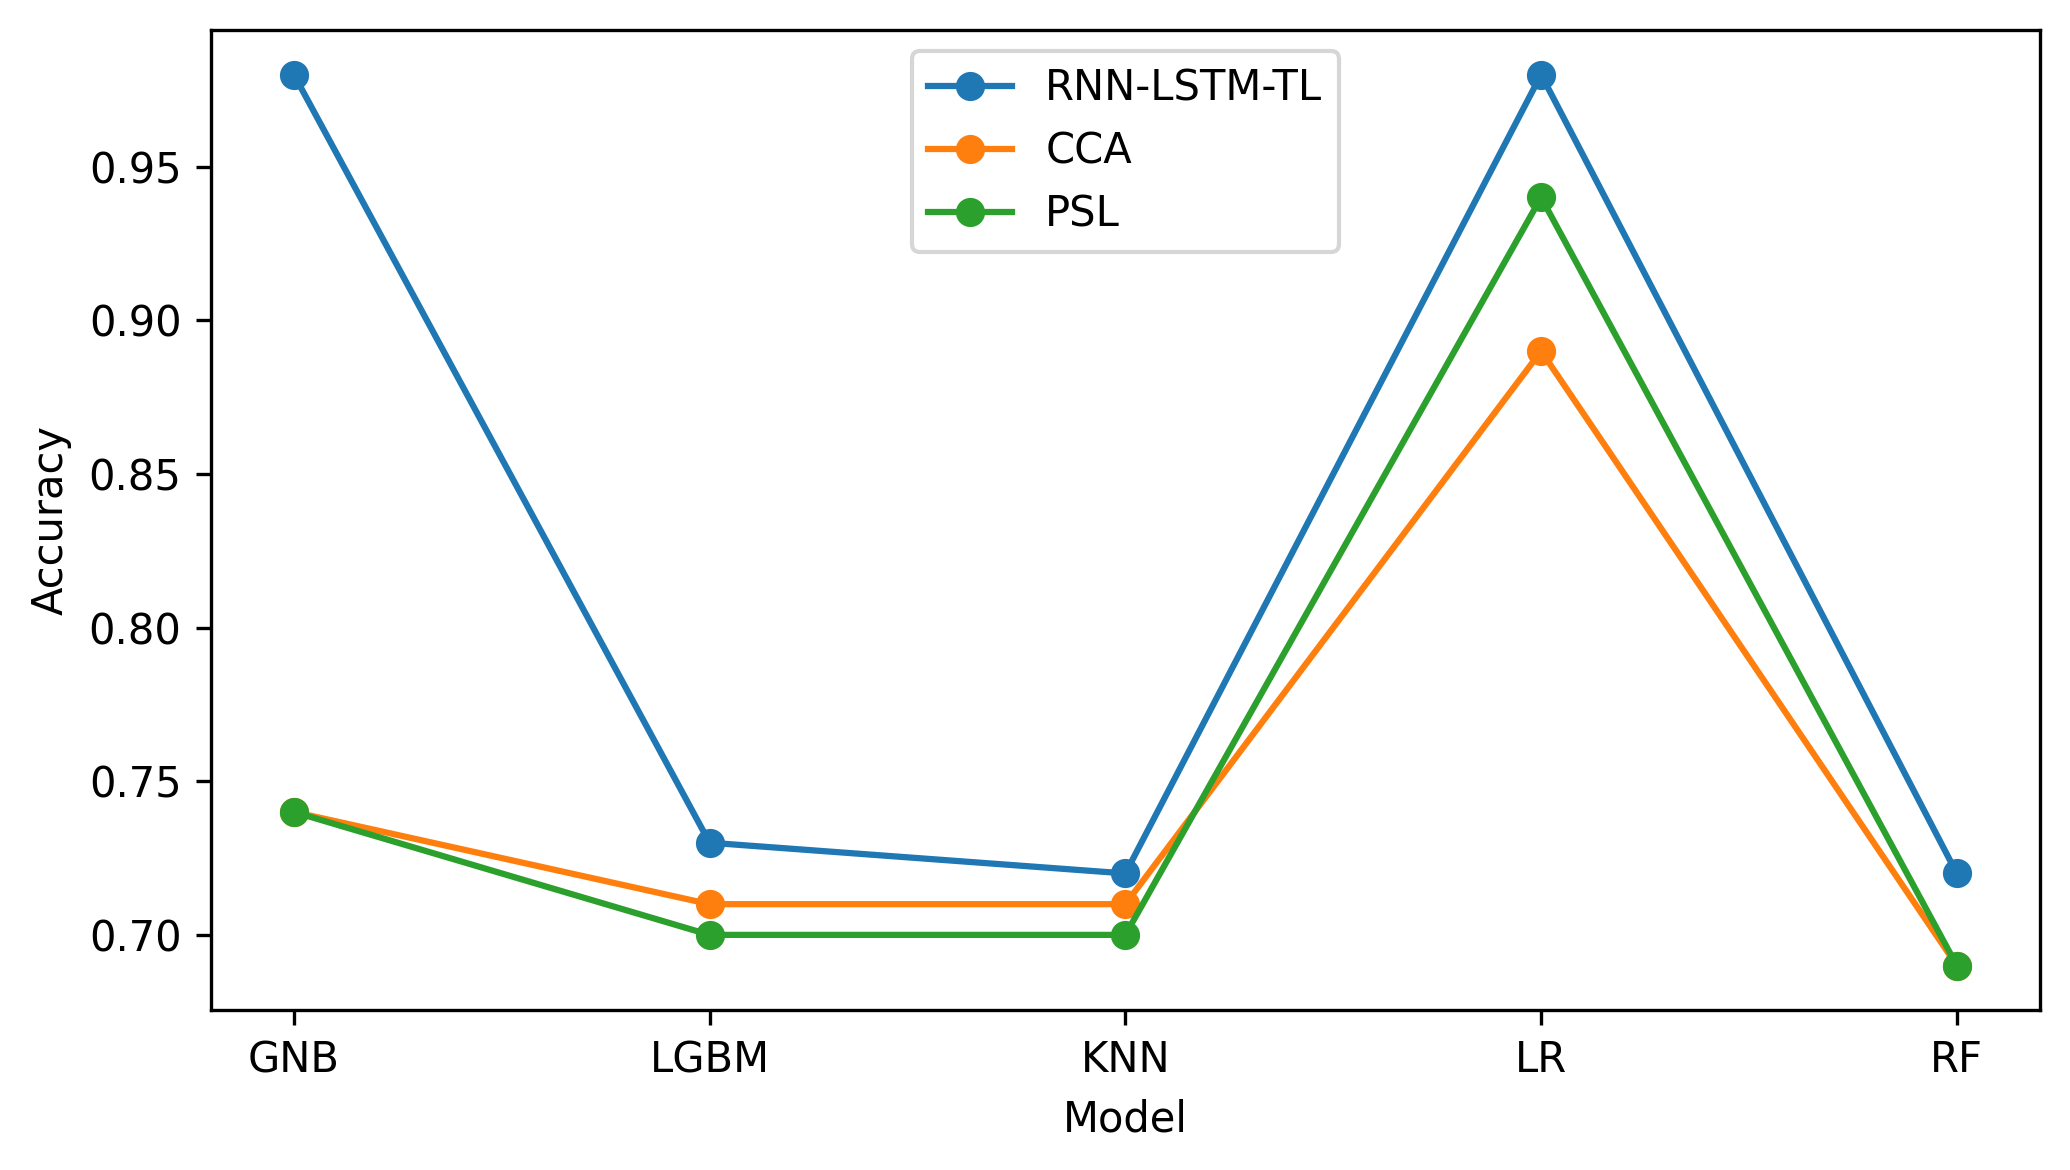

In [77]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
model_accuracy = {
    'RNN-LSTM-TL': {'GNB': 0.98, 'LGBM': 0.73, 'KNN': 0.72, 'LR': 0.98, 'RF': 0.72},
    'CCA': {'GNB': 0.74, 'LGBM': 0.71, 'KNN': 0.71, 'LR': 0.89, 'RF': 0.69},
    'PSL': {'GNB': 0.74, 'LGBM': 0.70, 'KNN': 0.70, 'LR': 0.94, 'RF': 0.69}
}
plt.figure(figsize=(7, 4),dpi=300)
# Plotting
for model_type, model_scores in model_accuracy.items():
    plt.plot(list(model_scores.keys()), list(model_scores.values()), marker='o', label=model_type)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()

# Show plot

plt.tight_layout()
plt.show()
